# DecisionTreeClassifier on Statlog (Heart) Data Set

[Source](http://www-bcf.usc.edu/~gareth/ISL/Heart.csv)

see [UCI Machine Learning Repository: Statlog (Heart) Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

See also 
- [Warm Up: Machine Learning with a Heart](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/) 
- [Machine Learning With A Heart - Benchmark](http://drivendata.co/blog/machine-learning-with-a-heart-benchmark/)

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier  

import seaborn as sns
sns.set()

## 1. Pre-Processing the Data

In [2]:
include = list(range(1,15))
data = pd.read_csv("data/heart.csv", usecols=include, sep =",")
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [3]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
# re-encode categorical data to numerical values 

data = pd.get_dummies(data, drop_first=True)
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


--- 

### 1.2 Define features and target 

In [5]:
data_X = data.drop("AHD_Yes", axis=1) # features, independent variables 
data_y = data["AHD_Yes"] # target, dependent variable 

In [6]:
data_X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0


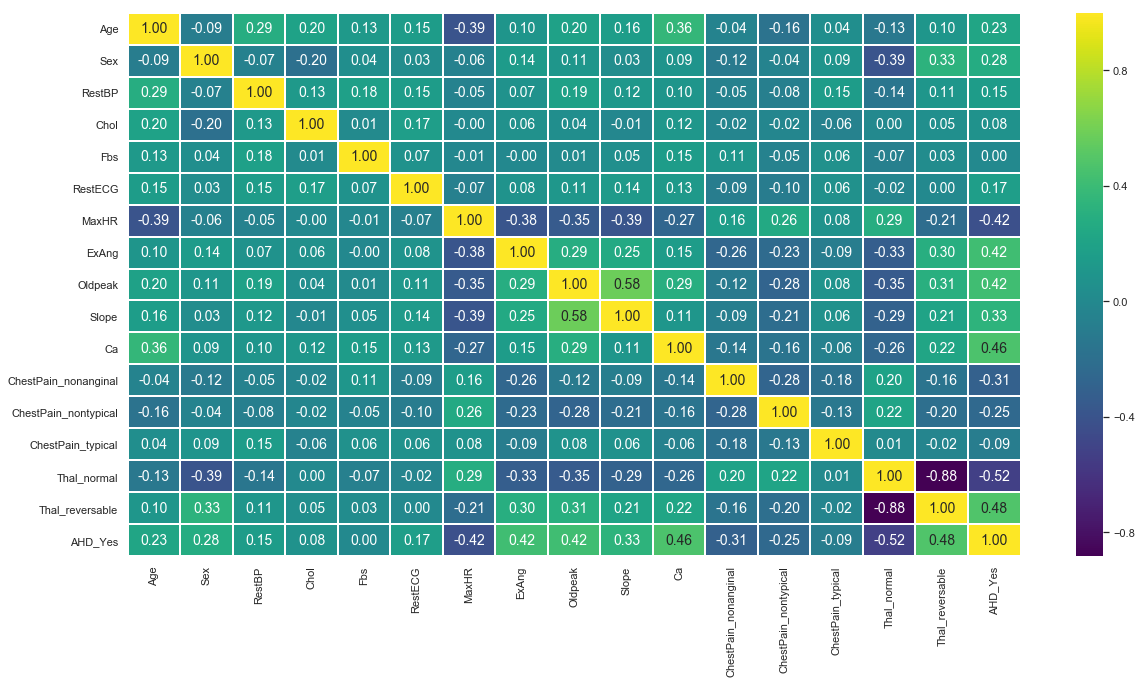

In [7]:
data = pd.concat([data_X, data_y], axis=1)
corr_matrix = data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 14}, linewidths=1, cmap='viridis');

--- 

## 2. Splitting Data into Training and Test Sets 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=11)

## 3. Scikit DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
# Make predictions on entire test data
y_prediction = dtree.predict(X_test)

In [12]:
print("MSE:", mean_squared_error(y_test, y_prediction))
print("RMSE:", np.sqrt(((y_test - y_prediction) ** 2).mean()))
print("R²:", r2_score(y_test, y_prediction))
print("RMSE % of mean:", np.sqrt(((y_test - y_prediction) ** 2).mean()) / y_test.mean())
print("Calibration:", y_prediction.mean() / y_test.mean())

MSE: 0.3
RMSE: 0.5477225575051661
R²: -0.20133481646273643
RMSE % of mean: 1.133219084493447
Calibration: 0.8620689655172414


:warning: **Caveat!** Results vary wildly depending on ```random_state```.

In [13]:
cm = metrics.confusion_matrix(y_test, y_prediction)

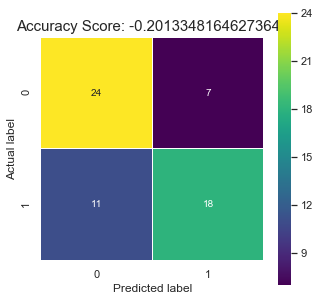

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='viridis');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
""" --------------------------------------------------------------------
xticks_val = [0.5, 1.5] 
xticks_lab = ['Negative', 'Positive'] 
yticks_val = [0.5, 1.5] 
yticks_lab = ['False', 'True'] 
plt.xticks(xticks_val, xticks_lab)
plt.yticks(yticks_val, yticks_lab)
-------------------------------------------------------------------- """
plot_title = 'Accuracy Score: {0}'.format(r2_score(y_test, y_prediction))
plt.title(plot_title, size = 15);
plt.show();

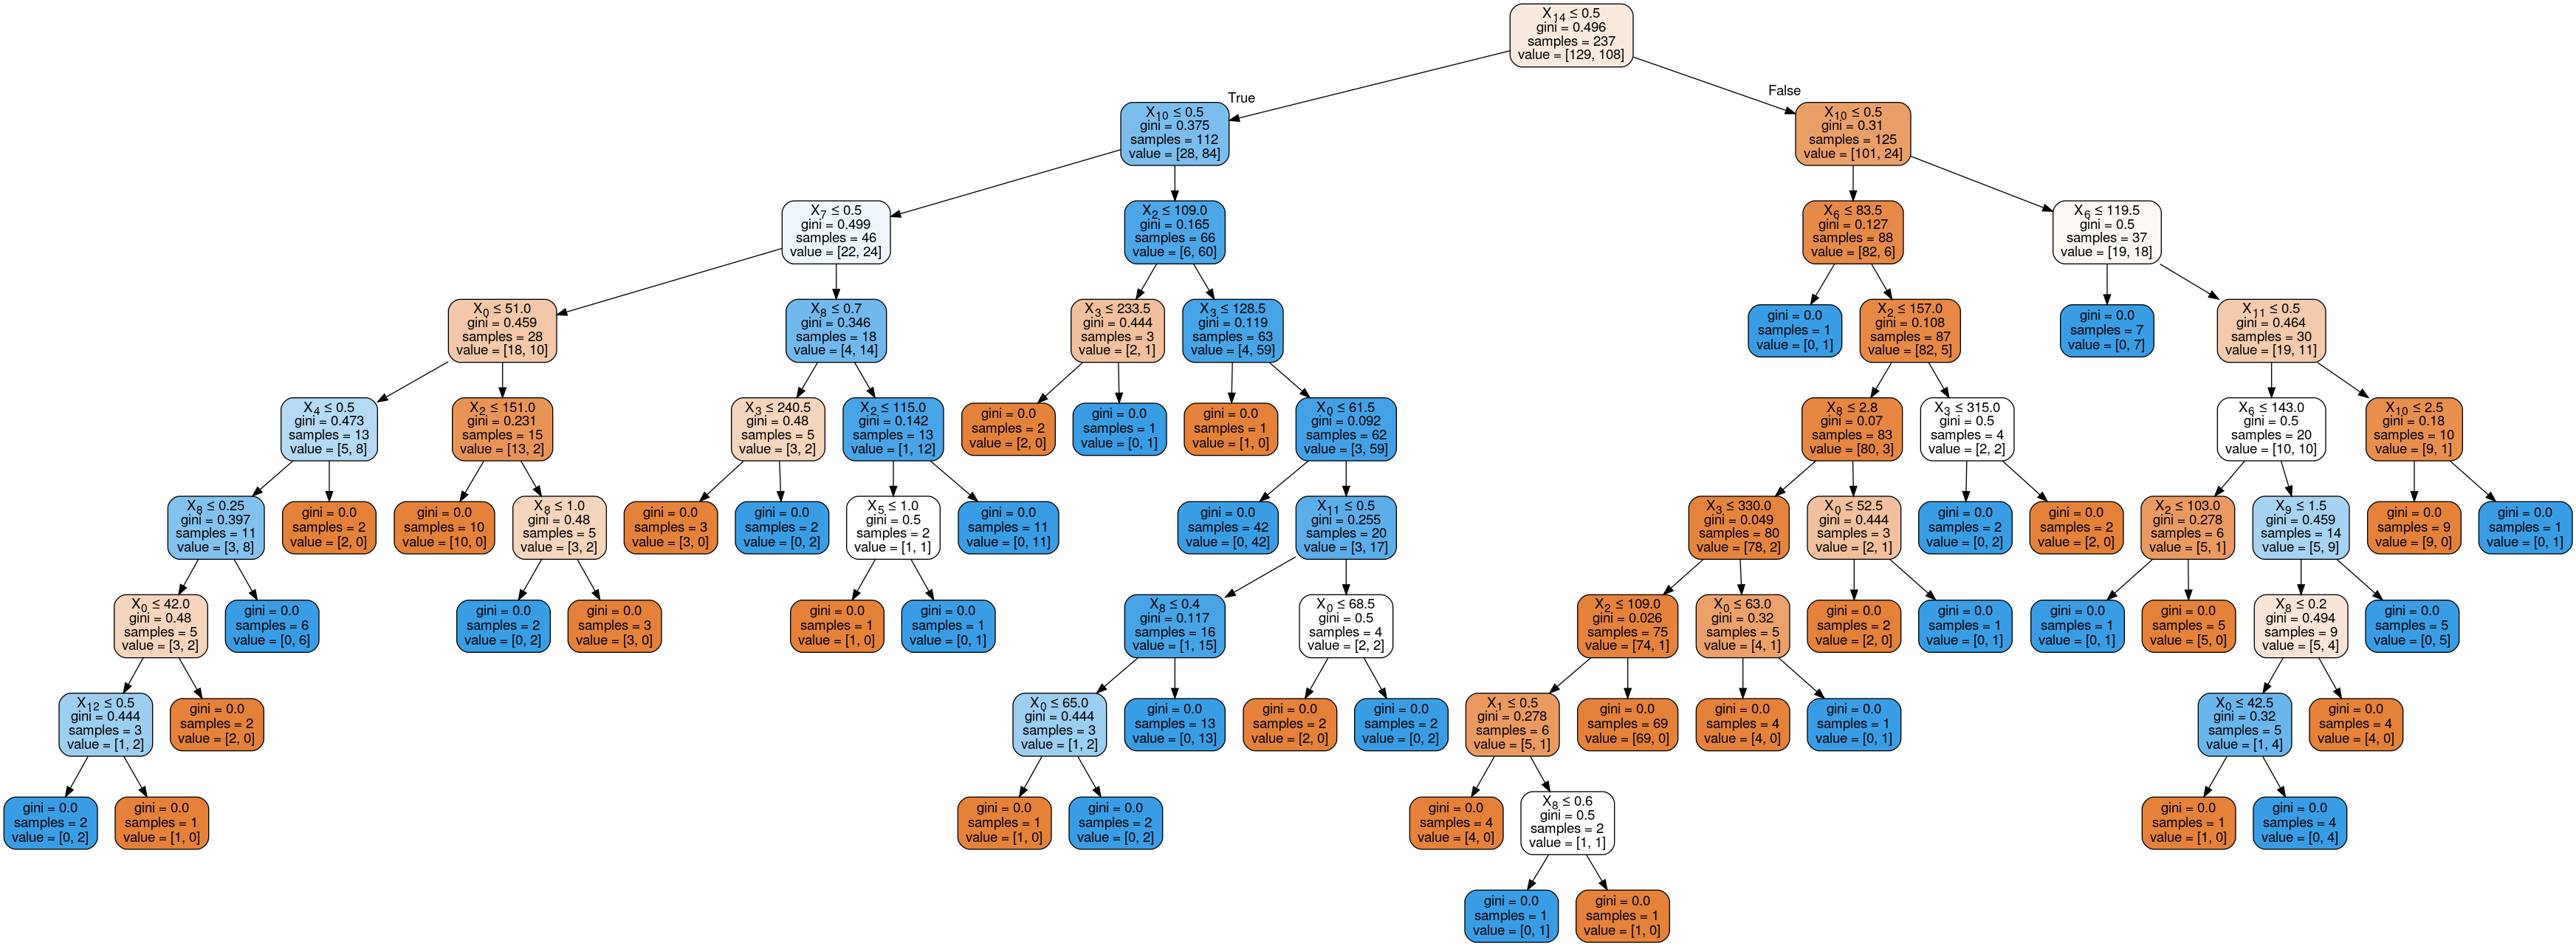

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())